# Preprocessing ISIC Dataset
## 1. Training Data
### 1.1. Imports and load ground truth 

In [3]:
import numpy as np
import pandas as pd
from PIL import Image
import os
from matplotlib import pyplot as plt


# Load ground truth
gt=pd.read_csv('ISIC2018_Task3_Training_GroundTruth.csv')

gt.head()

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC
0,ISIC_0024306,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0024307,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0024308,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0024309,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0024310,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#Convert csv to one array (ToDo: check conversion to numpy array and save the classes
Ytrain=gt['MEL']+ 2*gt['NV'] + 3*gt['BCC'] + 4*gt['AKIEC'] + 5*gt['BKL'] + 6*gt['DF'] + 7*gt['VASC']
Ytrain.shape

(10015,)

### 1.2. Load data 

In [5]:
def loadPics(directory, x, y):
    data = []
    # Iterate through files in the specified directory
    for file in os.listdir(directory):
         # Check if the file is from type ".jpg"
         if file.endswith(".jpg"):
             #Take the image, resize it, covert it into an numpy array and append it to our data list
             img = Image.open(os.path.join(directory, file))
             img = img.resize((x,y))
             imgArray = np.array(img)
             data.append(imgArray)

    #Convert data list to np array
    data = np.array(data)
    return data

data1 = loadPics("ISIC2018_Task3_Training_Input", 60,45)
#Check the shape of our numpy data array
data1.shape

(10015, 45, 60, 3)

### 1.3. Reshaping

In [6]:
#Reshape data in order to have one image per row
reshapeData = data1.reshape(data1.shape[0], data1.shape[1]*data1.shape[2]*data1.shape[3])
# Controll shape
reshapeData.shape

(10015, 8100)

### 1.4. Normalization

In [7]:
#Normalize data by dividing by the maximum value of the pixels (255)
# Check if 255 is correct
normData = reshapeData / 255.
print('normData.min()', normData.min())
print('normData.max()', normData.max())

normData.min() 0.0
normData.max() 1.0


### 1.5. Mean removal

In [8]:
#Remove the mean from each pixel
normData = normData - normData.mean(axis=0)
# Control if the means are now approx. 0
normData.mean(axis=0)

array([-7.21956250e-14,  3.79947918e-16, -1.44493725e-14, ...,
       -7.41491131e-14,  1.54741699e-15, -1.17042394e-14])

In [9]:
#Calculate the covariance matrix of the normalized data
cov = np.cov(normData, rowvar=False)
# Control shape of covariance matrix
cov.shape

(8100, 8100)

### 1.6. ZCA whitening

In [10]:
#Perform Singular Value Decomposition (SVD) on the covariance matrix 'cov'
U,S,V = np.linalg.svd(cov)

In [11]:
#Set a small constant 'epsilon' to avoid division by zero in the next step
epsilon = 0.1
# Perform Zero-phase Component Analysis whitening on the normalized data
DataZCA = U.dot(np.diag(1.0/np.sqrt(S + epsilon))).dot(U.T).dot(normData.T).T

In [12]:
#Rescale the ZCA-whitened data 'DataZCA' to the range [0, 1]
DataZCA_rescaled = (DataZCA - DataZCA.min()) / (DataZCA.max() - DataZCA.min())
print('min:', DataZCA_rescaled.min())
print('max:', DataZCA_rescaled.max())

min: 0.0
max: 1.0


### 1.7. Plot sample image

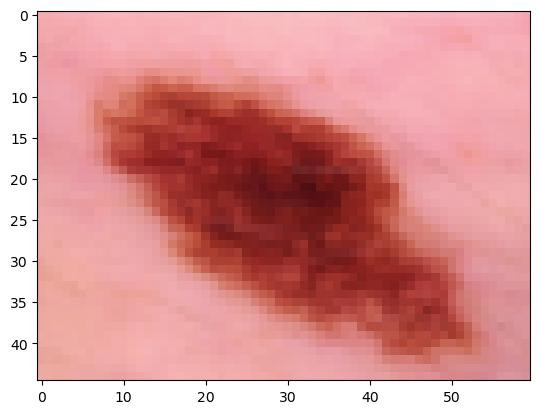

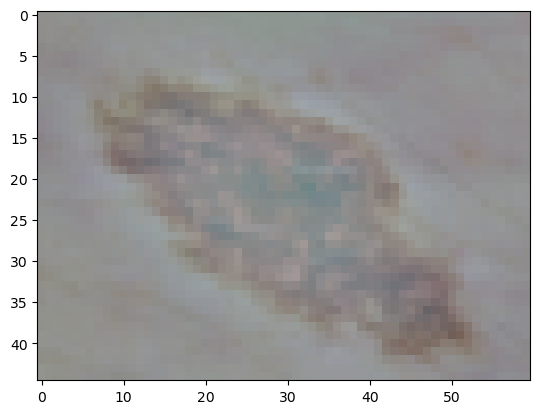

In [13]:
Xtrain = DataZCA_rescaled
#Function which takes a image of shape (1,4830) and plots it
x = 60
y = 45
def plotImage(X):
 plt.imshow(X.reshape(y,x,3))
 plt.show()
 plt.close()

#Plot third image before and after whitening
plotImage(reshapeData[2, :])
plotImage(Xtrain[2, :])

## 2. Test Data
### 2.1. Imports and load ground truth

In [14]:
# Load ground truth
Ytest=pd.read_csv('ISIC2018_Task3_Test_GroundTruth.csv')
#Convert csv to one array (ToDo: check conversion to numpy array and save the classes
Ytest=Ytest['MEL']+ 2*Ytest['NV'] + 3*Ytest['BCC'] + 4*Ytest['AKIEC'] + 5*Ytest['BKL'] + 6*Ytest['DF'] + 7*Ytest['VASC']

### 2.2. Load data

In [15]:
data2 = loadPics("ISIC2018_Task3_Test_Input", 60,45)
#Check the shape of our numpy data array
data2.shape

(1512, 45, 60, 3)

### 2.3. Reshaping

In [16]:
#Reshape data in order to have one image per row
reshapeData2 = data2.reshape(data2.shape[0], data2.shape[1]*data2.shape[2]*data2.shape[3])
# Controll shape
print(reshapeData2.shape)

(1512, 8100)


### 2.4. Normalization

In [17]:
#Normalize data by dividing by the maximum value of the pixels (255)
normData2 = reshapeData2 / 255
print('normData2.min()', normData2.min())
print('normData2.max()', normData2.max())

normData2.min() 0.0
normData2.max() 1.0


### 2.5. Mean Removal

In [18]:
#Remove the mean from each pixel
normData2 = normData2 - normData2.mean(axis=0)
# Control if the means are now approx. 0
print(normData2.mean(axis=0))

[ 1.55482623e-15 -6.25712004e-16  9.63221272e-16 ...  5.26254525e-16
 -3.29065111e-16 -2.82585536e-16]


### 2.6. ZCA Whitening

In [19]:
#Calculate the covariance matrix of the normalized data
cov2 = np.cov(normData2, rowvar=False)
# Control shape of covariance matrix
print(cov2.shape)

#Perform Singular Value Decomposition (SVD) on the covariance matrix 'cov'
U2,S2,V2 = np.linalg.svd(cov2)
#Set a small constant 'epsilon' to avoid division by zero in the next step
epsilon = 0.1
# Perform Zero-phase Component Analysis whitening on the normalized data
DataZCA2 = U2.dot(np.diag(1.0/np.sqrt(S2 + epsilon))).dot(U2.T).dot(normData2.T).T
#Rescale the ZCA-whitened data 'DataZCA' to the range [0, 1]
DataZCA_rescaled2 = (DataZCA2 - DataZCA2.min()) / (DataZCA2.max() - DataZCA2.min())
print('min:', DataZCA_rescaled2.min())
print('max:', DataZCA_rescaled2.max())

(8100, 8100)
min: 0.0
max: 1.0


### 2.7. Plot sample image

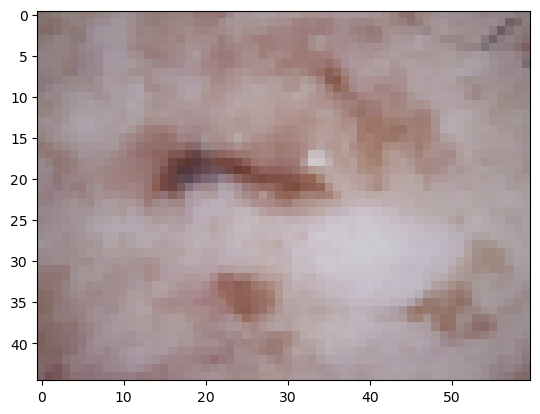

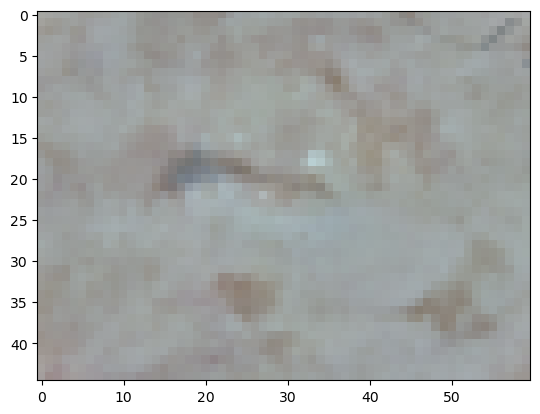

In [20]:
Xtest = DataZCA_rescaled2

#Plot third image before and after whitening
plotImage(reshapeData2[2, :])
plotImage(Xtest[2, :])

## 3. Save preprocessed data

In [21]:
# Save the NumPy array to an npy file
np.save('Trainpics_preprocessed.npy', Xtrain)
np.save('Testpics_preprocessed.npy', Xtest)
np.save('TrainGT_preprocessed.npy', Ytrain)
np.save('TestGT_preprocessed.npy', Ytest)